## **Importing Modules**

In [1]:
import numpy as np
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, AUC
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Helper Functions**

In [2]:
# For plotting accuracy during training phase
def accuracy_plotter(history):
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    plt.clf()

# For plotting loss during training phase
def loss_plotter(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    plt.clf()

In [3]:
# Parameters
nb_epochs = 25
num_words = 10000
common_words = 10
nb_classes = 46

## **Loading Data**

In [4]:
# Choosing the top 10000 frequent words and skipping the top 15 common words 
(data, targets) = reuters.load_data(num_words=num_words, skip_top=common_words, test_split=0)[0]

2113536/2110848 [==============================] - 0s 0us/step


## **Data Analysis**

In [5]:
print("Shape of the data :", data.shape)

Shape of the data : (11228,)


In [6]:
print("Categories of the targets: ", np.unique(targets))

Categories of the targets:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [7]:
print("Number of unique words :", len(np.unique(np.hstack(data))))

Number of unique words : 9991


In [8]:
print("Average length of a sentence", np.mean([len(i) for i in data]))

Average length of a sentence 145.96419665122906


In [9]:
print("Max length of a sentence : ", np.max([len(i) for i in data]))

Max length of a sentence :  2376


In [10]:
# Retrieving the word_index dictionary
word_dict = {value:key for (key, value) in reuters.get_word_index().items()}

557056/550378 [==============================] - 0s 0us/step


In [11]:
# An example newswire
print(' '.join([word_dict[x] for x in data[22]]))
print(targets[22])

of of profit of 1 75 of not concern government member be name incorporation profits on tonnes of this oper 10 of commodities of reserve not whether profits on tonnes of of of council gross of yields finance its all also is of sources 4 is of an source of of this rose billion trade vs 000 of this of of commodities or of agreement of around against should with shareholders total 000 april 0 of oper 10 conference of of pct dlrs
4


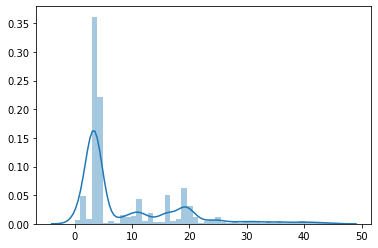

In [12]:
#Check if the data is imbalanced
sns.distplot(targets)

The data is imbalanced as the number of examples belonging to one class are much larger that of the other classes. Accuracy is not a good measure to evaluate our model. Instead Precision_Recall-AUC will help us better understand the performance of our model. A high AUC represents both high recall and high precision which shows that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).
Furthermore, to balance the data, I am going to oversample the data using the smote method.

## **Data Preprocessing**

In [13]:
# Splitting into train and test data
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=42)

In [14]:
# Tokenizing the sequences
tokenizer = Tokenizer(num_words=num_words, oov_token="oov_tok")
tokenizer.fit_on_sequences(x_train)
word_index = tokenizer.word_index

In [15]:
# Fitting the sequences on the tokenizer
train_sequences = tokenizer.sequences_to_matrix(x_train, mode = "binary")
test_sequences = tokenizer.sequences_to_matrix(x_test, mode = "binary")

In [16]:
print("Shape of vectorized sequences :", train_sequences.shape)
print("Shape of targets :", y_train.shape)

Shape of vectorized sequences : (7859, 10000)
Shape of targets : (7859,)


## **Balancing the dataset**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE("not majority")
train_sequences_sm, y_train_sm = smote.fit_resample(train_sequences, y_train)

In [ ]:
# After upsampling
print("Shape of vectorized sequences :", train_sequences_sm.shape)
print("Shape of targets :", y_train_sm.shape)

In [ ]:
sns.distplot(y_train_sm)

In [ ]:
# One hot encoding targets
from keras.utils import to_categorical
train_labels = to_categorical(y_train_sm, num_classes = nb_classes)
test_labels = to_categorical(y_test, num_classes = nb_classes)

## **Model Architecture**

In [ ]:
def get_model():
  model = Sequential()
  model.add(Embedding(input_dim = 10000, output_dim = 64, max))
  model.add(Dense(64, activation = "relu", input_shape = (num_words,)))
  model.add(Dropout(0.3))
  model.add(Dense(32, activation = "relu"))
  model.add(Dropout(0.3))
  model.add(Dense(nb_classes, activation="softmax"))
  return model

In [ ]:
model = get_model()

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=[CategoricalAccuracy(name="categorical_accuracy")])

In [ ]:
history = model.fit(train_sequences_sm, train_labels_sm, validation_split=0.3, shuffle=True, epochs = nb_epochs, callbacks=[early_stop])

In [ ]:
accuracy_plotter(history)

In [ ]:
loss_plotter(history)

In [ ]:
model.metrics_names

In [ ]:
_, acc = model.evaluate(test_sequences, test_labels)
print("Accuracy on test set :", round(acc*100, 3))

In [ ]:
y_pred = model.predict(test_sequences)

In [ ]:
precision.update_state(test_labels, y_pred
recall.update_state(test_labels, y_pred)
auc.update_state(test_labels, y_pred)

In [ ]:
print("Precision :", precision.result().numpy())
print("Recall :", recall.result().numpy())
print("AUC :", auc.result().numpy())

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels.argmax(axis=1), y_pred.argmax(axis = 1))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()